# NLP Twitter Disasters

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

rc = {"axes.spines.left" : True,
      "axes.spines.right" : False,
      "axes.spines.bottom" : True,
      "axes.spines.top" : False,
      "xtick.bottom" : True,
      "xtick.labelbottom" : True,
      "ytick.labelleft" : True,
      "ytick.left" : True,
      "figure.subplot.hspace" : 0.7,
    "figure.titleweight" : "bold",
    "axes.titleweight" : "bold"}
plt.rcParams.update(rc)

In [2]:
train = pd.read_csv('dataset/train.csv')
test = pd.read_csv('dataset/test.csv')

train.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [3]:
print(f'Training set: {train.shape[0]} rows and {train.shape[1]} columns.')
print(f'Test set: {test.shape[0]} rows and {test.shape[1]} columns.')

Training set: 7613 rows and 5 columns.
Test set: 3263 rows and 4 columns.


> The additional column in our training set is of course the target column.

# Cleaning

In [ ]:
def remove_URL(text):
    url = re.compile(r'https?://\S+|www\.\S+')
    return url.sub(r'', text)

Our target is either 0 or 1, indicating a relationship with disaster tweet. 

Percentage of disaster tweets: 0.4296597924602653


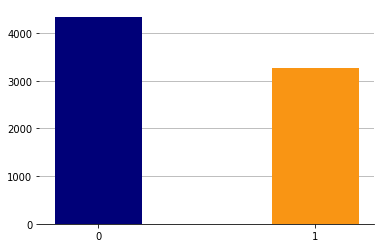

In [5]:
dt = train.target.value_counts()

fig, ax = plt.subplots()
ax.grid(axis='y', zorder=0)
ax.bar([str(x) for x in dt.index.values], dt.values, width = 0.4, zorder=3, color=["#000078", "#f99514"])
ax.spines['left'].set_visible(False)

print("Percentage of disaster tweets:", 
      train.target.value_counts()[1]/(train.target.value_counts()[0]+ train.target.value_counts()[1]))

# EDA

In [6]:
def tweet_length(text):
    return len(text)

# Get number of characters of all tweets
train["length"] = train["text"].apply(tweet_length)

Text(0.5, 1.0, 'Disaster vs Non-disaster tweets')

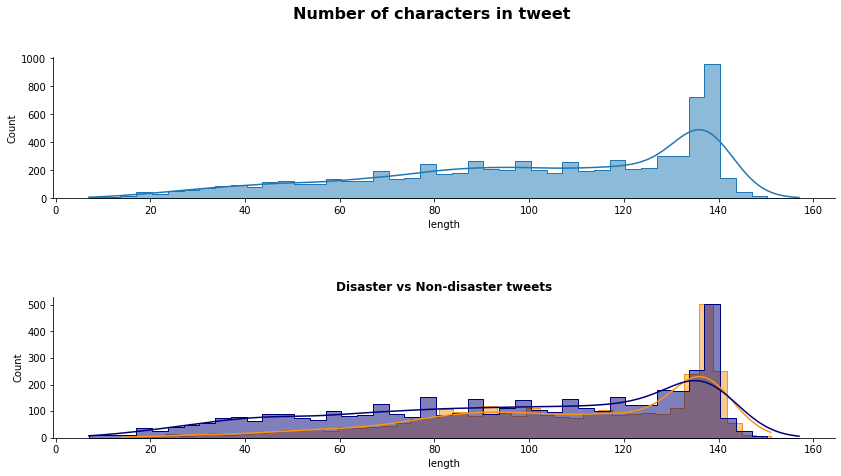

In [9]:
fig, axs = plt.subplots(2, figsize=(14,7))

sns.histplot(train["length"], kde=True, ax=axs[0], element="step", bins=45)

sns.histplot(train[train["target"] == 1]["length"], kde=True, ax=axs[1], element="step", color="#f99514", bins=45)
sns.histplot(train[train["target"] == 0]["length"], kde=True, ax=axs[1], element="step", color="#000078", bins=45)

fig.suptitle('Number of characters in tweet', fontsize=16)
axs[1].set_title('Disaster vs Non-disaster tweets')